In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [30]:
bias=100
X,y,coef=make_regression(n_samples=1000,n_features=5,bias=bias,coef=True,random_state=42,noise=10)

In [31]:
coef,bias

(array([28.62798621, 46.07121713, 16.82365791, 24.74629812, 18.99347437]), 100)

In [32]:
linear=LinearRegression().fit(X,y)

In [33]:
linear.coef_,linear.intercept_

(array([28.05749028, 45.94154566, 16.61187941, 24.53193249, 19.36893323]),
 99.3828533985921)

In [34]:
linear.rank_

5

In [35]:
class CustomLinearRegression:
    def __init__(self,lr=0.01):
        self.__lr=lr
        self.errors=[]
    def fit(self,X,y):
        self.__X=X
        self.__y=y
        self.coef_=np.random.randn(X.shape[1])
        self.intercept_=np.random.random()
        for k in range(0,20):
            #print("Error",self.error())
            self.gradient_decent()
            self.errors.append(self.error())
        return self.errors
        
    def gradient_decent(self):
        delta_coef,delta_bias=self.gradient()
        self.coef_+=delta_coef
        self.intercept_+=delta_bias
        #print("Coefficient :",self.coef_,"\nIntercept : ",self.intercept_,"\n")
            
    def gradient(self):
        yh=self.hypo(self.__X)
        diff=(yh-self.__y.reshape((-1,1)))
        del_err_coef=(np.dot(diff.T,self.__X)).flatten()/len(yh)
        del_err_inter=(2*diff).mean()
        return (-del_err_coef*self.__lr,-del_err_inter*self.__lr)
    
    def hypo(self,X):
        return ((np.sum(X*self.coef_,axis=1,keepdims=True))+self.intercept_)
    def error(self):
        yh=self.hypo(self.__X)
        err=((yh-self.__y.reshape((-1,1)))**2).mean()
        return err
    

In [36]:
model=CustomLinearRegression(lr=.3)
err=model.fit(X,y)

In [37]:
model.coef_

array([28.0060877 , 45.91071334, 16.61358265, 24.50673167, 19.35173985])

In [38]:
model.intercept_


99.38474364268406

In [39]:
model.error()

106.95504408632482

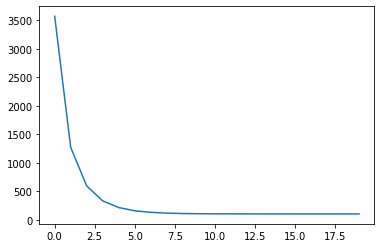

In [40]:
plt.plot(err)